# 4. Tuning

In [138]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import GridSearchCV
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [6]:
digits = datasets.load_digits() # 디지털 숫자 데이터

In [48]:
digits

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

In [7]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [8]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [9]:
knn = KNeighborsClassifier()

In [11]:
knn.get_params() #함수내 쓸 수 있는 파라미터 보기

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [12]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [13]:
param_grid = {'n_neighbors': range(1,20)}

In [14]:
param_grid

{'n_neighbors': range(1, 20)}

In [33]:
grid_model = GridSearchCV(knn, return_train_score=True, param_grid = param_grid, cv=10, verbose=3 )
# cv 값도 조정할 수 있음 여러가지 param을 수정 하면서 가장 정확히 표현할 수 있는 param을 찾는다

In [34]:
grid_model.fit(digits.data, digits.target)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.933) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.972) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.967) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.983) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.994) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.989) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.978) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.966) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.993, test=0.939) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [35]:
grid_model.cv_results_.keys() #시간에 대한정보, 스코어에 대한 정보, split한 각각의 데이터, 파라미터에 대한 정보 등등 다나옴.
# 궁극적으로 궁금한건 train_score >> 보기쉽게 DF로 만들자!

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [36]:
colnames = ['param_n_neighbors','mean_train_score','mean_test_score']

In [37]:
grid_df = pd.DataFrame(grid_model.cv_results_, columns = colnames)

In [38]:
grid_df.set_index('param_n_neighbors', inplace=True)

In [29]:
grid_df.sort_values(['mean_test_score','mean_train_score'], ascending=False)

,mean_train_score,mean_test_score
param_n_neighbors,,
3,0.993322,0.976633
1,1.000000,0.974963
2,0.990973,0.974407
4,0.991776,0.972182
5,0.990540,0.971074
6,0.989427,0.968290
7,0.990107,0.967734
8,0.988685,0.964944
9,0.987881,0.964944


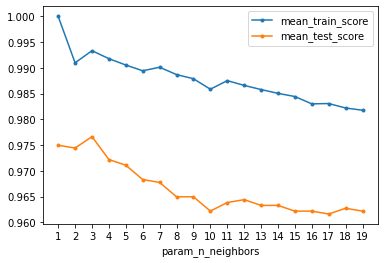

In [32]:
ax = grid_df.plot.line(marker='.')
ax.set_xticks(grid_df.index); # param_n_neighbors를 1이나 3을 쓰는게 가장 best!

In [39]:
grid_model.best_estimator_ #한방에 나온다~ best가

KNeighborsClassifier(n_neighbors=3)

In [40]:
grid_model.best_score_ 

0.9766325263811299

In [41]:
grid_model.best_params_ 

{'n_neighbors': 3}

In [42]:
grid_model.best_index_

2

------------------------

In [139]:
grid_knn = GridSearchCV(knn, param_grid=param_grid, cv=2) #cv 2는 반은 test 반은 train 

In [140]:
outer_scores=cross_val_score(grid_knn, digits.data, digits.target, cv=5) #cv 5는 train test 를 5번 나눠서함

In [141]:
outer_scores #따라서 결과가 5개

array([0.96111111, 0.95277778, 0.96657382, 0.98607242, 0.96657382])

In [142]:
grid_knn.fit(digits.data, digits.target)

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)})

In [148]:
grid_knn.best_estimator_.get_params()

In [145]:
grid_knn.best_score_

0.9610455566813907

In [147]:
grid_knn.best_params_ 

{'n_neighbors': 1}

In [150]:
preferred_params=grid_knn.best_estimator_.get_params()

In [151]:
final_knn = KNeighborsClassifier(**preferred_params)

In [152]:
final_knn.fit(digits.data, digits.target)

KNeighborsClassifier(n_neighbors=1)

In [154]:
final_knn.score(digits.data, digits.target)

1.0

---------------

## Heart disease 로 해보자~

In [44]:
heart = pd.read_csv('heart.csv')

In [45]:
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [46]:
knn = KNeighborsClassifier()

In [120]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [49]:
grid_model = GridSearchCV(knn, return_train_score=True, param_grid = param_grid, cv=10, verbose=3 )

In [107]:
grid_model.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [51]:
grid_model.fit(heart, heart.target)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.742) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.645) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.258) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.567) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.500) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.733) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.633) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.600) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.790, test=0.645) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [52]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [108]:
colnames = ['cv','mean_train_score','mean_test_score']

In [109]:
grid_df = pd.DataFrame(grid_model.cv_results_, columns = colnames)

In [111]:
grid_df.set_index('cv', inplace=True)

In [112]:
grid_df.sort_values(['mean_test_score','mean_train_score'], ascending=False)

,mean_train_score,mean_test_score
cv,,
NaN,1.000000,0.809831
NaN,0.864258,0.662743
NaN,0.758487,0.515628
NaN,0.674768,0.452349
NaN,0.587655,0.386823
NaN,0.488096,0.318973
NaN,0.411741,0.257840
NaN,0.376689,0.232891
NaN,0.333151,0.216982


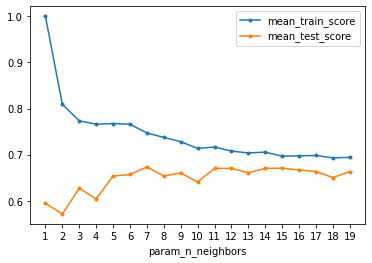

In [57]:
ax = grid_df.plot.line(marker='.')
ax.set_xticks(grid_df.index); # param_n_neighbors를 1이나 3을 쓰는게 가장 best!

In [113]:
grid_model.best_estimator_ #한방에 나온다~ best가

KNeighborsClassifier(n_neighbors=1)

In [114]:
grid_model.best_score_ 

0.8098314606741572

In [115]:
grid_model.best_params_ 

{'n_neighbors': 1}

In [116]:
grid_model.best_index_

0

In [118]:
lr = LinearRegression()

In [121]:
lr.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [122]:
lr_model = LinearRegression(fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    n_jobs=None,
    positive=False)

In [123]:
lr_model.get_params().keys()

dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize', 'positive'])

In [124]:
lr_model.fit(heart, heart.target)

LinearRegression()

In [127]:
lr_model.results_.keys()

AttributeError: 'LinearRegression' object has no attribute 'results_'

In [129]:
ss = ShuffleSplit(test_size=0.25, n_splits=10)

In [130]:
grid_model = GridSearchCV(knn, return_train_score=True, param_grid = param_grid, cv=ss, verbose=3 )

In [131]:
grid_model.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__algorithm', 'estimator__leaf_size', 'estimator__metric', 'estimator__metric_params', 'estimator__n_jobs', 'estimator__n_neighbors', 'estimator__p', 'estimator__weights', 'estimator', 'n_jobs', 'param_grid', 'pre_dispatch', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [132]:
grid_model.fit(heart, heart.target)

Fitting 10 folds for each of 19 candidates, totalling 190 fits
[CV 1/10] END n_neighbors=1;, score=(train=1.000, test=0.579) total time=   0.0s
[CV 2/10] END n_neighbors=1;, score=(train=1.000, test=0.553) total time=   0.0s
[CV 3/10] END n_neighbors=1;, score=(train=1.000, test=0.632) total time=   0.0s
[CV 4/10] END n_neighbors=1;, score=(train=1.000, test=0.605) total time=   0.0s
[CV 5/10] END n_neighbors=1;, score=(train=1.000, test=0.566) total time=   0.0s
[CV 6/10] END n_neighbors=1;, score=(train=1.000, test=0.671) total time=   0.0s
[CV 7/10] END n_neighbors=1;, score=(train=1.000, test=0.618) total time=   0.0s
[CV 8/10] END n_neighbors=1;, score=(train=1.000, test=0.605) total time=   0.0s
[CV 9/10] END n_neighbors=1;, score=(train=1.000, test=0.553) total time=   0.0s
[CV 10/10] END n_neighbors=1;, score=(train=1.000, test=0.618) total time=   0.0s
[CV 1/10] END n_neighbors=2;, score=(train=0.819, test=0.500) total time=   0.0s
[CV 2/10] END n_neighbors=2;, score=(train=0.

GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=None, test_size=0.25, train_size=None),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=3)

In [133]:
grid_model.cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_n_neighbors', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'split5_train_score', 'split6_train_score', 'split7_train_score', 'split8_train_score', 'split9_train_score', 'mean_train_score', 'std_train_score'])

In [134]:
colnames = ['cv','mean_train_score','mean_test_score']

In [135]:
grid_df = pd.DataFrame(grid_model.cv_results_, columns = colnames)

In [136]:
grid_df.set_index('cv', inplace=True)

In [137]:
grid_df.sort_values(['mean_test_score','mean_train_score'], ascending=False)

,mean_train_score,mean_test_score
cv,,
NaN,0.710132,0.665789
NaN,0.703524,0.657895
NaN,0.707048,0.655263
NaN,0.700881,0.655263
NaN,0.705286,0.652632
NaN,0.704846,0.651316
NaN,0.718943,0.648684
NaN,0.712335,0.648684
NaN,0.718943,0.646053


-----------

## diabet로 해보기

In [62]:
diabets = datasets.load_diabetes()

In [63]:
df = pd.DataFrame(diabets.data, columns = diabets.feature_names)

In [65]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


In [79]:
df['target'] = diabets.target

In [80]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930,220.0


In [81]:
knn = KNeighborsClassifier()

In [82]:
grid_model = GridSearchCV(knn, return_train_score=True, param_grid = param_grid, cv=5, verbose=2 )

In [83]:
grid_model.fit(df, df.target)

Fitting 5 folds for each of 19 candidates, totalling 95 fits
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=1; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=2; total time=   0.0s
[CV] END ......................................n_neighbors=3; total time=   0.0s
[CV] END ......................................n

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 20)}, return_train_score=True,
             verbose=2)

In [84]:
colnames = ['param_n_neighbors','mean_train_score','mean_test_score']

In [85]:
grid_df = pd.DataFrame(grid_model.cv_results_, columns = colnames)

In [86]:
grid_df.set_index('param_n_neighbors', inplace=True)

In [87]:
grid_df.sort_values(['mean_test_score','mean_train_score'], ascending=False)

,mean_train_score,mean_test_score
param_n_neighbors,,
1,1.000000,0.809831
2,0.864258,0.662743
3,0.758487,0.515628
4,0.674768,0.452349
5,0.587655,0.386823
6,0.488096,0.318973
7,0.411741,0.257840
8,0.376689,0.232891
9,0.333151,0.216982


In [88]:
grid_model.best_estimator_ #한방에 나온다~ best가

KNeighborsClassifier(n_neighbors=1)

In [89]:
grid_model.best_score_ 

0.8098314606741572

In [90]:
grid_model.best_params_ 

{'n_neighbors': 1}

In [91]:
grid_model.best_index_

0